<a href="https://colab.research.google.com/github/nsmith167/ml-learning/blob/main/movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data from model

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #Only take top 10,000 most common words

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Encode word usage as a 1 (used) or 0 (not used) for each of the top 10,000 words

In [3]:
import numpy as np

def vectorize_sequences(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    results[i, sequence] = 1.0
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


Vectorize the labels - just need to turn the 1s and 0s into floating point numbers

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Build the model

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Set aside some validation data

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6652 - loss: 0.6220 - val_accuracy: 0.8659 - val_loss: 0.4114
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8915 - loss: 0.3567 - val_accuracy: 0.8834 - val_loss: 0.3203
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9184 - loss: 0.2596 - val_accuracy: 0.8802 - val_loss: 0.3015
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9324 - loss: 0.2095 - val_accuracy: 0.8864 - val_loss: 0.2811
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9471 - loss: 0.1733 - val_accuracy: 0.8726 - val_loss: 0.3180
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9582 - loss: 0.1437 - val_accuracy: 0.8879 - val_loss: 0.2787
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9651 - loss: 0.1226 - val_accuracy: 0.8787 - val_loss: 0.3184
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9692 - loss: 0.1053 - val_accuracy: 0.8838 - v

Plot our results

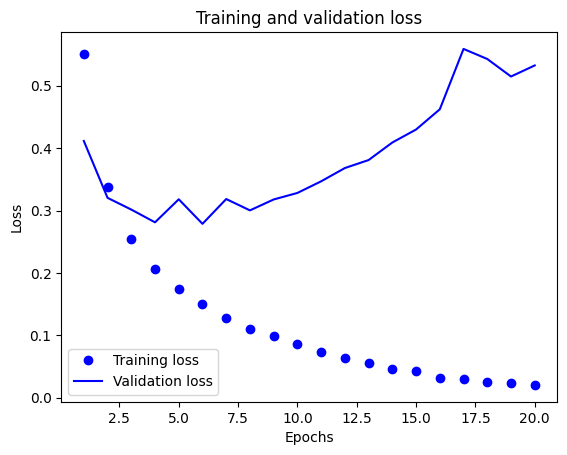

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plot training and validation accuracy

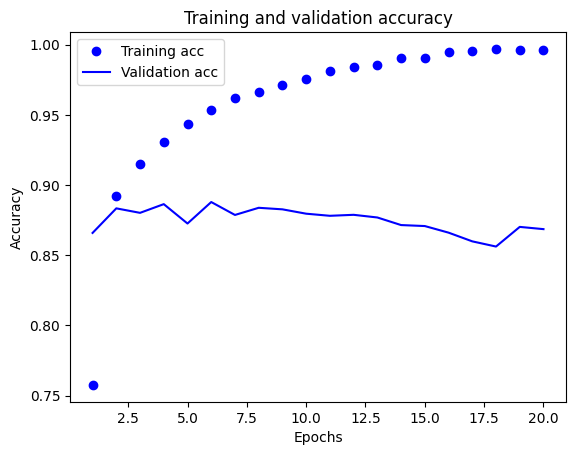

In [9]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Retrain with fewer epochs to avoid overfitting

In [14]:
from keras import Input

model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7429 - loss: 0.5696
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9037 - loss: 0.3032
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9223 - loss: 0.2238
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9365 - loss: 0.1866
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8742 - loss: 0.3083


Predict using the model

In [15]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.25155628],
       [0.9986669 ],
       [0.9757126 ],
       ...,
       [0.17004445],
       [0.11098123],
       [0.7654422 ]], dtype=float32)